In [31]:
Нейронная сеть с прямой связью — искусственная нейронная сеть, в которой соединения между узлами не образуют цикл. Такая сеть отличается 
от рекуррентной нейронной сети. Нейронная сеть с прямой связью была первым и самым простым типом искусственной нейронной сети. 
В этой сети информация перемещается только в одном направлении вперед от входных узлов, через скрытые узлы (если они есть) и к 
выходным узлам. В сети нет циклов или петель обратных связей

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import ops
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error, mean_squared_error

In [33]:
data = datasets.fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = data.data
y = data.target
df.head()
print(data.data.shape)
df

(20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=987)

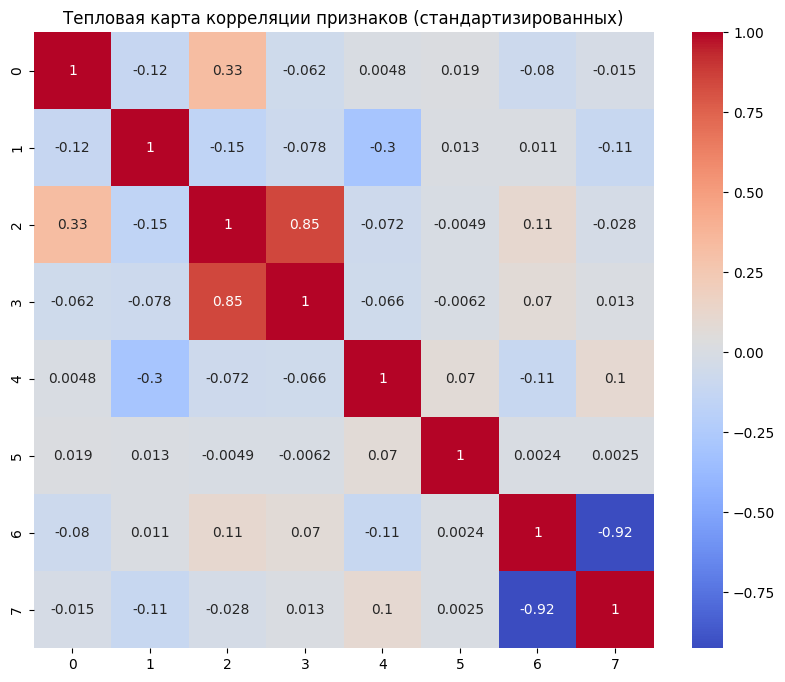

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляции признаков (стандартизированных)")
plt.show()

In [37]:
model=Sequential([Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
                 Dense(32,activation='relu'),
                 Dense(1)])

/usr/local/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(loss="mae",optimizer="adam")
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.3092 - val_loss: 2.6620
Epoch 2/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.2764 - val_loss: 0.8208
Epoch 3/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.2243 - val_loss: 7.3969
Epoch 4/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9524 - val_loss: 4.0180
Epoch 5/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9310 - val_loss: 2.1665
Epoch 6/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4219 - val_loss: 5.1996
Epoch 7/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8121 - val_loss: 0.8159
Epoch 8/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5826 - val_loss: 2.0626
Epoch 9/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9289 - val_loss: 1.0997
Epoch 10/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8213 - val_loss: 2.2441
Epoch 11/100
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4493 - val_loss: 1.0254
Epoch 12/100
452/452 ━━━━━━━━━━━━━━━━━━━━

In [39]:
model.evaluate(X_test, y_test)

194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.4843


0.48576486110687256

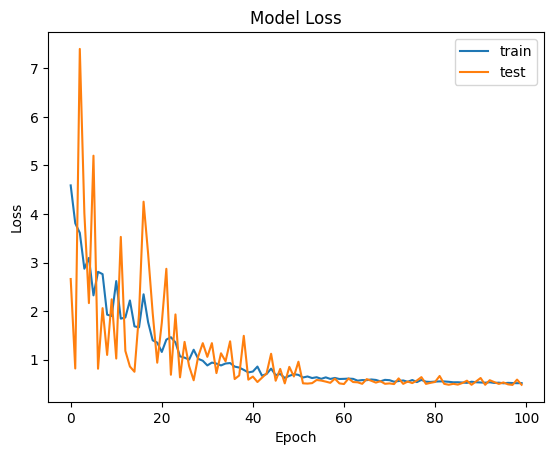

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()